Assignment 4

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss.
1. Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
2. Consider a simple linear model with two parameters and one input variable and mean square error cost function to implement the gradient descent algorithm to find the intercepts. Assume a  suitable terminating condition. 
3. Plot the model alongside the scatterplot to show the fit model.
4. Perform steps 1,2,3 in batch mode for varying values of alpha, learning rate and plot the results.
5. For each of the experiments performed above in steps 1,2,3,4 with varying learning rates visualize the cost function as a contour plot as well as plot the values of parameters to visualize the stepwise traversion of the parameters on this contour plot.


In [3]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [13]:
#Read from csv file
data = pd.read_csv('ex1data1.txt', header = None)
x = np.array(data.iloc[:,0])
y = np.array(data.iloc[:,1])


1. Scatter Plot


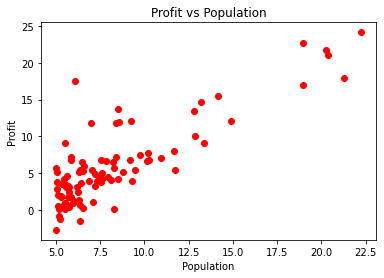

In [8]:
plot.scatter(x,y, color = 'red')
plot.title("Profit vs Population")
plot.xlabel("Population")
plot.ylabel("Profit")
plot.show()

2. 3. 4.  5.

When theta = [0, 0] 
Cost = 32.07
When theta = [-1, 2]
Cost computed = 54.24

Gradient Descent

Parameters theta: [-3.49868047  1.1531406 ]


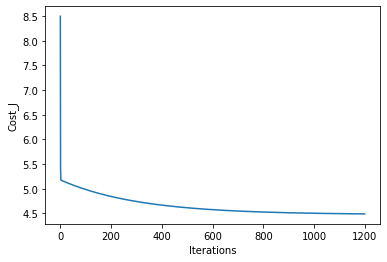

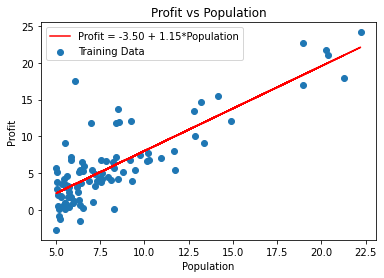

For population = 35,000, we predict a profit of  5373.116357828627
For population = 70,000, we predict a profit of  45733.03737497631
[-3.49868047  1.1531406 ]


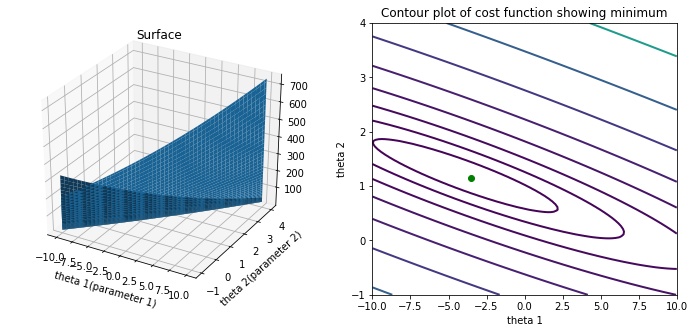

In [14]:
m = len(y)
ones = np.ones((m,1))

x = np.stack([np.ones(m), x], axis=1)

def costFunction(x,y,theta):
    J = (np.sum((x @ theta - y)*(x @ theta - y))) / (2 * m)
    return J

theta = np.zeros(2, dtype = int)
J = costFunction(x, y, theta)
print('When theta = [0, 0] \nCost = %.2f' % J)
theta = np.array([-1,2])
J = costFunction(x, y, theta)
print('When theta = [-1, 2]\nCost computed = %.2f' % J)

def gradientDescent(x, y, theta, alpha, iterations):
    m = y.size
    J_history = np.zeros(iterations)

    for i in np.arange(iterations):
        h = x.dot(theta)
        theta = theta - alpha * (1 / m) * (x.T.dot(h - y))
        J_history[i] = costFunction(x, y, theta)
    return (theta, J_history)
print('\nGradient Descent\n')

iterations = 1200
alpha = 0.009 #change for different learning rates

theta, Cost_J = gradientDescent(x, y, theta, alpha, iterations)
print('Parameters theta:', theta)

plot.plot(Cost_J)
plot.xlabel('Iterations')
plot.ylabel('Cost_J')
plot.show()
plot.scatter(x[:,1],y, label = 'Training Data')
plot.title('Profit vs Population')
plot.xlabel('Population')
plot.ylabel('Profit')
plot.plot(x[:,1], x.dot(theta),color='red',label='Profit = %0.2f + %0.2f*Population'%(theta[0],theta[1]))
plot.legend(loc='best')
plot.show()

predict1 = np.dot(np.array([1, 3.5]),theta) # inner product to get y
predict2 = np.dot(np.array([1, 7]),theta) # inner product to get y


print('For population = 35,000, we predict a profit of ', predict1*10000)
print('For population = 70,000, we predict a profit of ', predict2*10000)
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)


J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = costFunction(x, y, [theta0, theta1])

J_vals = J_vals.T

fig = plot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plot.xlabel('theta 1(parameter 1)')
plot.ylabel('theta 2(parameter 2)')
plot.title('Surface')

ax = plot.subplot(122)
plot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, levels=np.logspace(-2, 3, 20))
plot.xlabel('theta 1')
plot.ylabel('theta 2')
plot.scatter(theta[0], theta[1], color = 'green')
plot.title('Contour plot of cost function showing minimum')
print(theta)
plot.show()